<a href="https://colab.research.google.com/github/np-n/Face-Mask_Detection/blob/master/Face_Mask_Detection_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

###Installing mtcnn for Face/Facial landmark detection

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.0 MB/s 


In [ ]:
%matplotlib inline

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mtcnn import MTCNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# Datasets path
image_dir = '/content/drive/MyDrive/Datasets/Face_Mask_Datasets'
face_with_mask = '/content/drive/MyDrive/Datasets/Face_Mask_Datasets/with_mask'
face_without_mask = '/content/drive/MyDrive/Datasets/Face_Mask_Datasets/without_mask'

### Plotting Data

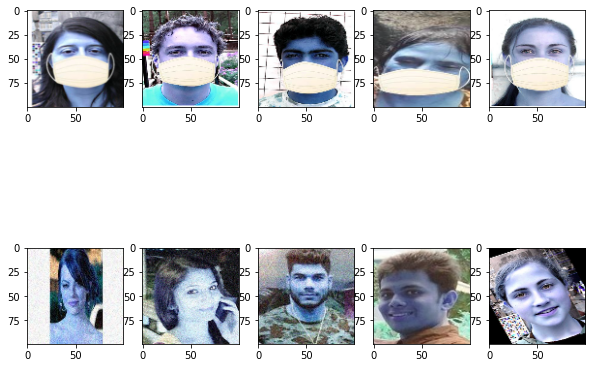

In [ ]:
# Normal Image
rows = 2
columns = 5
fig,ax = plt.subplots(2,5,figsize=(10, 8))
for i, faces in enumerate(os.listdir(face_with_mask)[:5]):
  image =cv2.imread(os.path.join(face_with_mask,faces))
  image = cv2.resize(image,(100,100))
  ax[0,i].imshow(image)

for i, faces in enumerate(os.listdir(face_without_mask)[:5]):
  image =cv2.imread(os.path.join(face_without_mask,faces))
  image = cv2.resize(image,(100,100))
  ax[1,i].imshow(image)
fig.show()


### Image names for both faces with mask and without mask

In [ ]:
# Image names for both faces_with_mask and faces_without_mask data
faces_with_mask = []
faces_without_mask = []
# To save only face data from given data
for face in (os.listdir(face_with_mask)):
  faces_with_mask.append('with_mask/'+ face)
for face in (os.listdir(face_without_mask)):
  faces_without_mask.append('without_mask/'+ face)

random.shuffle(faces_with_mask)
random.shuffle(faces_without_mask)

print(len(faces_with_mask), len(faces_without_mask))

690 686


### Storing mtcnn detected faces as input to model

In [ ]:
x = []
y = []
# faces_without_mask = 0,faces_with_mask = 1
for i, faces in enumerate((faces_without_mask,faces_with_mask)):
  for face in faces:
    try:
      image = cv2.cvtColor(cv2.imread(os.path.join(image_dir,face)),cv2.COLOR_BGR2RGB)
      detector = MTCNN()
      result = detector.detect_faces(image)
      # print(result[0]['box'])
      x0,y0,width,height = result[0]['box']
      img = image[y0:y0+height,x0:x0+width]# y:y+h,x:x+h
      img = cv2.resize(img,(128,128))
      x.append(img)
      y.append(i)
    except:
      print('Error location :'+image_dir+face)
  print(len(x))
  print(len(y))

Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswithout_mask/augmented_image_1.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswithout_mask/389.jpg
684
684
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/augmented_image_114.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/93-with-mask.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/augmented_image_115.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/5-with-mask.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/127-with-mask.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/augmented_image_65.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/augmented_image_116.jpg
Error location :/content/drive/MyDrive/Datasets/Face_Mask_Datasetswith_mask/387-with-mask.jpg
Error location :/content/drive/M

### Splitting Datasets to train/test dataset

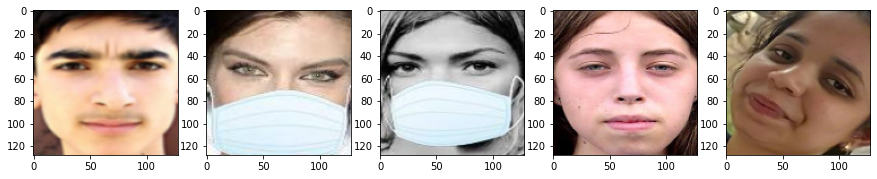

In [ ]:
# Splitting the data for training and testing
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state = 42)

# Viewing trainning datas
fig, ax = plt.subplots(1, 5, figsize=(15, 15))

for i, img in enumerate(X_train[:5]):
  ax[i].imshow(img)
fig.show()

X_train = np.array(X_train, dtype='float32')
y_train = np.array(y_train)
X_test = np.array(X_test, dtype='float32')
y_test = np.array(y_test)

In [ ]:
y_train[1]

0

In [ ]:
X_train

array([[[[ 41.,  38.,  39.],
         [ 49.,  42.,  42.],
         [ 58.,  48.,  48.],
         ...,
         [ 13.,  12.,   8.],
         [ 13.,  12.,  10.],
         [119., 119., 116.]],

        [[ 48.,  40.,  42.],
         [ 58.,  46.,  47.],
         [ 67.,  52.,  52.],
         ...,
         [ 11.,  10.,   6.],
         [  5.,   4.,   2.],
         [ 43.,  42.,  41.]],

        [[ 60.,  49.,  50.],
         [ 68.,  51.,  51.],
         [ 70.,  49.,  50.],
         ...,
         [ 11.,  10.,   6.],
         [ 18.,  17.,  13.],
         [ 12.,  12.,  10.]],

        ...,

        [[242., 244., 246.],
         [231., 236., 240.],
         [229., 237., 243.],
         ...,
         [254., 254., 254.],
         [251., 251., 251.],
         [244., 244., 244.]],

        [[232., 233., 235.],
         [237., 241., 244.],
         [236., 242., 246.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [249., 249., 249.]],

        [[230., 230., 234.],
       

### Creating VGG16 model architecture

In [ ]:
# Creating model architecture
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam


base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)), classes=1)

new_model = base_model.output
new_model = Flatten()(new_model)
new_model = Dense(256, activation='relu')(new_model)
new_model = Dense(1, activation='sigmoid')(new_model)

for layer in base_model.layers:
  layer.trainable = False

model = Model(inputs=base_model.input, outputs=new_model)
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy' ,optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model_4135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4136 (InputLayer)      [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0

### Training/Validating model

In [ ]:
EPOCHS = 30
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
31/31 [==============================] - 199s 6s/step - loss: 0.7242 - accuracy: 0.9660 - val_loss: 1.3851 - val_accuracy: 0.9918
Epoch 2/30
31/31 [==============================] - 197s 6s/step - loss: 0.1555 - accuracy: 0.9969 - val_loss: 0.7294 - val_accuracy: 0.9918
Epoch 3/30
31/31 [==============================] - 197s 6s/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 1.4032 - val_accuracy: 0.9918
Epoch 4/30
31/31 [==============================] - 197s 6s/step - loss: 7.1083e-32 - accuracy: 1.0000 - val_loss: 1.4474 - val_accuracy: 0.9918
Epoch 5/30
31/31 [==============================] - 197s 6s/step - loss: 1.2382e-32 - accuracy: 1.0000 - val_loss: 1.4493 - val_accuracy: 0.9918
Epoch 6/30
31/31 [==============================] - 198s 6s/step - loss: 1.2426e-32 - accuracy: 1.0000 - val_loss: 1.4494 - val_accuracy: 0.9918
Epoch 7/30
31/31 [==============================] - 197s 6s/step - loss: 1.2413e-32 - accuracy: 1.0000 - val_loss: 1.4494 - val_accuracy: 0.99

### Plotting Accuracy and Loss plot

In [ ]:

def plot_accuracy_curve(epochs,history):
  # Plotting training and validation accuracy
  epochs = range(1,(epochs+1))
  plt.plot(epochs,history.history['accuracy'])
  plt.plot(epochs,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='center')
  plt.show()

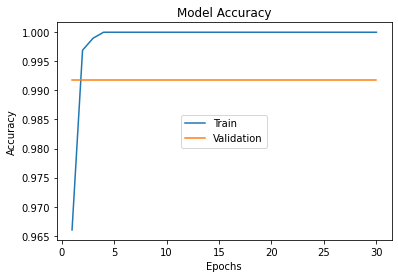

In [ ]:
plot_accuracy_curve(EPOCHS,history)

In [ ]:
def plot_loss_curve(epochs,history):
  # Plotting training and validation accuracy
  epochs = range(1,(epochs+1))
  plt.plot(epochs,history.history['loss'])
  plt.plot(epochs,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='center')
  plt.show()

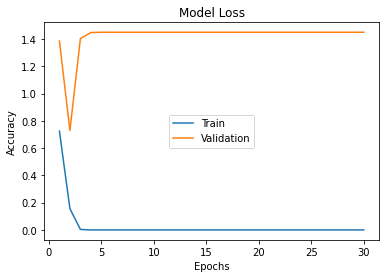

In [ ]:
plot_loss_curve(EPOCHS,history)

In [ ]:
history.history

{'accuracy': [0.9660144448280334,
  0.9969103932380676,
  0.9989701509475708,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.724186360836029,
  0.15552228689193726,
  0.003453019540756941,
  7.108276052875791e-32,
  1.2381640688948515e-32,
  1.242575258383106e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278835050943e-32,
  1.241278688114149e-32,
  1.2412782473037675e-32,
  1.241278688114149e-32,
  1.241278835050943e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278835050943e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278688114149e-32,
  1.241278835050943e-32,
  1.

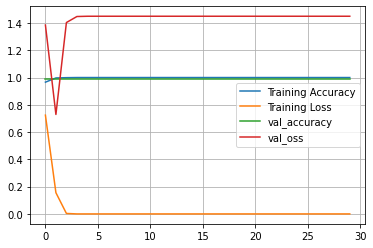

5/5 [==============================] - 22s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [ ]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_oss')
plt.grid()
plt.legend()
plt.show()

losss, acc = model.evaluate(X_test, y_test)
acc

### Saving model for future purpose

In [ ]:
model.save('/content/drive/MyDrive/Saved_Models/face_mask_vgg16.h5')

### Loading model from Google Drive and Testing
<ul><li>Loading Model</li></ul>

In [ ]:
import tensorflow as tf
mask_model = tf.keras.models.load_model('/content/drive/MyDrive/Saved_Models/face_mask_vgg16.h5')

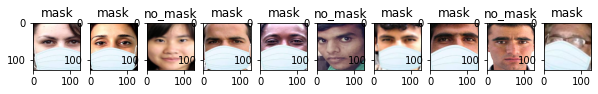

In [ ]:
fig,ax = plt.subplots(1,10,figsize=(10,10))
category = ('no_mask','mask')

for i in range(10):
  try:
    image = random.choice(X_test)
    face_image = cv2.resize(image,(128,128))
    predictions = model.predict(face_image.reshape(-1,128,128,3))
    title = category[int(predictions[0][0])]
    ax[i].imshow(face_image.astype('uint32'))
    ax[i].title.set_text(title)
  except:
    print('Error Occured!')
fig.show()

<ul><li>On single image</li></ul>

0.0


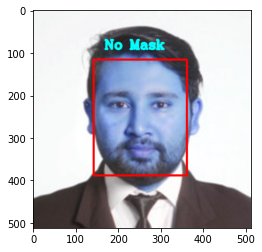

In [ ]:
# Example 1
from mtcnn import MTCNN
img = cv2.imread('/content/drive/MyDrive/Image/Amir-Rajak.jpg')
category = ('No Mask','Mask')
detector = MTCNN()
output = detector.detect_faces(img)
x0,y0,width,height = output[0]['box']
face_img = img[y0:y0+height,x0:x0+width]
face_img = cv2.resize(face_img,(128,128))
prediction = model.predict(face_img.reshape(-1,128,128,3))
print(prediction[0][0])
label = category[int(prediction[0][0])]
cv2.rectangle(img,pt1=(x0,y0),pt2=(x0+width,y0+height),color=(255,0,0),thickness=3)
cv2.putText(img,label,(x0+25,y0-25),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,255),3,cv2.LINE_AA)
plt.imshow(img)
# plt.title(label)
plt.show()

0.0


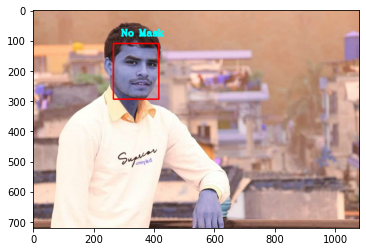

In [ ]:
# Example 2 
from mtcnn import MTCNN
img = cv2.imread('/content/drive/MyDrive/Image/Mukti-Dumre.jpg')
category = ('No Mask','Mask')
detector = MTCNN()
output = detector.detect_faces(img)
x0,y0,width,height = output[0]['box']
face_img = img[y0:y0+height,x0:x0+width]
face_img = cv2.resize(face_img,(128,128))
prediction = model.predict(face_img.reshape(-1,128,128,3))
print(prediction[0][0])
label = category[int(prediction[0][0])]
cv2.rectangle(img,pt1=(x0,y0),pt2=(x0+width,y0+height),color=(255,0,0),thickness=3)
cv2.putText(img,label,(x0+25,y0-25),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,255),3,cv2.LINE_AA)
plt.imshow(img)
# plt.title(label)
plt.show()

1.0


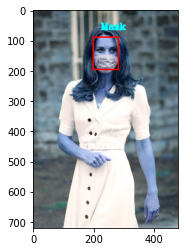

In [ ]:
# Example 3 
from mtcnn import MTCNN
img = cv2.imread('/content/drive/MyDrive/Image/kate-middleton-mask.jpg')
category = ('No Mask','Mask')
detector = MTCNN()
output = detector.detect_faces(img)
x0,y0,width,height = output[0]['box']
face_img = img[y0:y0+height,x0:x0+width]
face_img = cv2.resize(face_img,(128,128))
prediction = model.predict(face_img.reshape(-1,128,128,3))
print(prediction[0][0])
label = category[int(prediction[0][0])]
cv2.rectangle(img,pt1=(x0,y0),pt2=(x0+width,y0+height),color=(255,0,0),thickness=3)
cv2.putText(img,label,(x0+25,y0-25),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,255),3,cv2.LINE_AA)
plt.imshow(img)
# plt.title(label)
plt.show()

<ul><li>Image with multiple faces </li></ul>

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


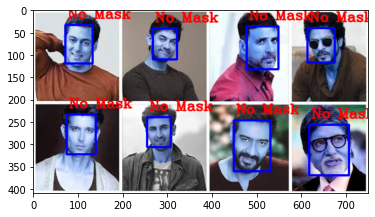

In [ ]:
# For multiple faces
from mtcnn import MTCNN
category = ('No Mask','Mask')
img = cv2.imread('/content/drive/MyDrive/Image/bollywood1.jpeg')
# Returns list of dictionary with facial landmarks as key-value pairs
output = detector.detect_faces(img)

for i in range(len(output)):
    # left_eyeX,left_eyeY = output[i]['keypoints']['left_eye']
    # right_eyeX,right_eyeY = output[i]['keypoints']['right_eye']
    # noseX,noseY = output[i]['keypoints']['nose']
    # mouth_leftX,mouth_leftY = output[i]['keypoints']['mouth_left']
    # mouth_rightX,mouth_rightY = output[i]['keypoints']['mouth_right']
    x,y,width,height = output[i]['box']
    face_img = img[y:y+height,x:x+width]
    face_img = cv2.resize(face_img,(128,128))
    prediction = model.predict(face_img.reshape(-1,128,128,3))
    print(prediction[0][0])
    label = category[int(prediction[0][0])]

    # cv2.circle(img,center=(left_eyeX,left_eyeY),color=(255,0,0),thickness=4,radius=2)
    # cv2.circle(img,center=(right_eyeX,right_eyeY),color=(255,0,0),thickness=4,radius=2)
    # cv2.circle(img,center=(noseX,noseY),color=(255,0,0),thickness=2,radius=4)
    # cv2.circle(img,center=(mouth_leftX,mouth_leftY),color=(255,0,0),thickness=4,radius=2)
    # cv2.circle(img,center=(mouth_rightX,mouth_rightY),color=(255,0,0),thickness=4,radius=2)
    cv2.rectangle(img,pt1=(x,y),pt2=(x+width,y+height),color=(0,0,255),thickness=3)
    cv2.putText(img,label,(x+5,y-15),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv2.LINE_AA)

plt.imshow(img)
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def predict(model, image):
  prediction = model.predict(image.reshape(-1,128,128,3))[0][0] #[[0.]] form
  return int(round(prediction))

predicted_results = [predict(model,image) for image in X_test]# Array
# print(predicted_results)

In [ ]:
# Confusion matrix
results = confusion_matrix(y_test,predicted_results)

In [ ]:
results

array([[73,  0],
       [ 0, 62]])

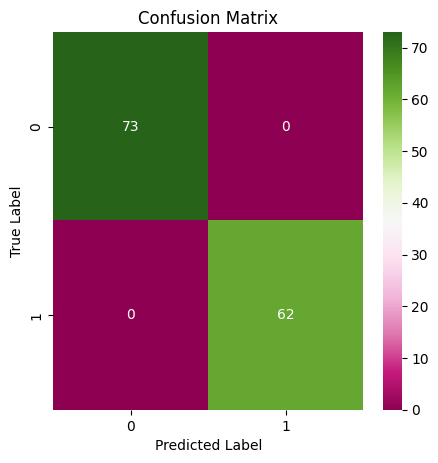

In [ ]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)
ax = sns.heatmap(results,annot=True,fmt='d',cmap="PiYG")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

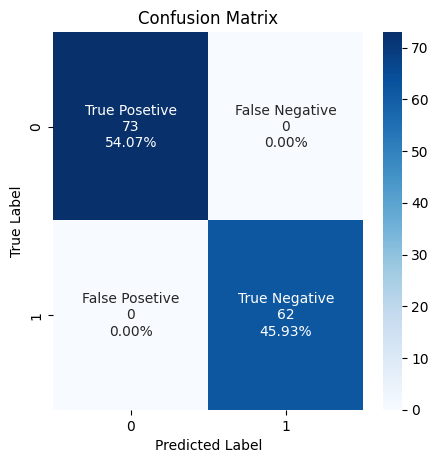

In [ ]:
group_names = ["True Posetive","False Negative","False Posetive","True Negative"]
group_counts = ['{0:0.0f}'.format(value) for value in
                results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f'{name}\n{count}\n{percentage}' for name, count, percentage in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig,ax = plt.subplots(figsize=(5,5),dpi=100)
ax = sns.heatmap(results, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
